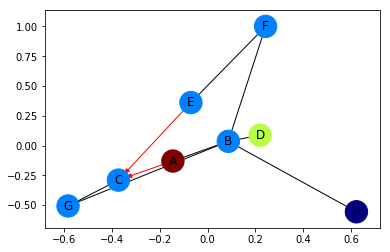

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

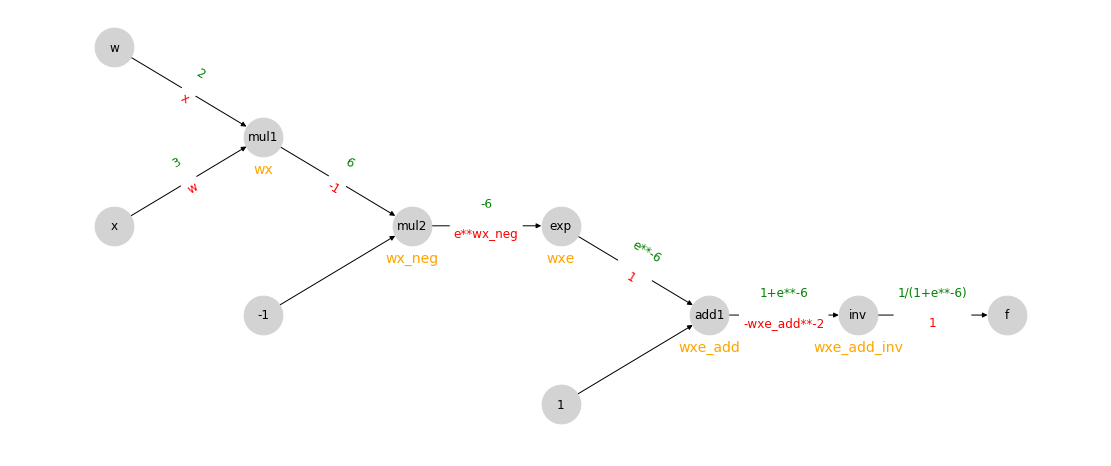

In [182]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from(['-1', '1', 'w','x','mul1','mul2', 'add1','exp', 'inv', 'f'])
g.add_edge('w','mul1')
g.add_edge('x','mul1')
g.add_edge('mul1','mul2')
g.add_edge('-1','mul2')
g.add_edge('mul1','mul2')
g.add_edge('mul2','exp')
g.add_edge('exp','add1')
g.add_edge('1','add1')
g.add_edge('add1','inv')
g.add_edge('inv','f')

fixed_positions = {'w':(0,4),'x':(0,2), 'mul1':(1,3), 'mul2':(2,2), '-1':(1,1), 
                   'exp':(3,2), '1':(3,0), 'add1':(4,1), 'inv':(5,1), 'f':(6,1)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(g, pos=fixed_positions, fixed = fixed_nodes)
plt.figure(3,figsize=(15,6)) 
nx.draw(g,pos,with_labels=True, node_size = 1500, node_color = 'lightgrey')
nx.draw_networkx_edge_labels(G,pos,
    {},
    font_color='red'                     
)
node_labels = {'mul1':'wx', 'mul2':'wx_neg', 'exp':'wxe', 'add1':'wxe_add', 'inv':'wxe_add_inv'}
node_labels = {k:'\n\n\n\n'+v for k,v in node_labels.items()}
edge_label_forward = {('w','mul1'):"2", 
                         ('x','mul1'):"3",
                         ('mul1','mul2'):"6",
                         ('mul2','exp'):"-6",
                         ('exp','add1'):"e**-6",
                         ('add1','inv'):"1+e**-6",
                         ('inv','f'):"1/(1+e**-6)"}
edge_label_local_grad = {('w','mul1'):"x", 
                         ('x','mul1'):"w",
                         ('mul1','mul2'):"-1",
                         ('mul2','exp'):"e**wx_neg",
                         ('exp','add1'):"1",
                         ('add1','inv'):"-wxe_add**-2",
                         ('inv','f'):"1"}

edge_label_forward = {k: v+'\n\n\n' for k,v in edge_label_forward.items()}
edge_label_local_grad = {k:'\n'+v for k,v in edge_label_local_grad.items()}
nx.draw_networkx_labels(G,pos,node_labels,font_size=14,font_color='orange')
nx.draw_networkx_edge_labels(G, pos, edge_label_forward, font_color='green', font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_label_local_grad, font_color='red', font_size=12)

#plt.draw()
plt.show()

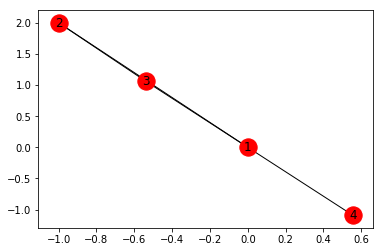

In [54]:
import networkx as nx
G=nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,1),(1,4)]) #define G
fixed_positions = {1:(0,0),2:(-1,2)}#dict with two of the positions set
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
nx.draw_networkx(G,pos)
plt.draw()
plt.show()

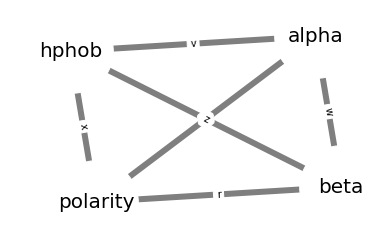

In [103]:
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.Graph()

a="hphob"
b="polarity"
c="alpha"
d="beta"
G.add_edge(a,b,weight=0.5)
G.add_edge(b,c,weight=0.5)
G.add_edge(c,d,weight=0.5)
G.add_edge(a,d,weight=0.5)
G.add_edge(a,c,weight=0.5)
G.add_edge(b,d,weight=0.5)

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=7000, node_color="white")

# edges
nx.draw_networkx_edges(G,pos,
        width=6,alpha=0.5,edge_color='black')


# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

nx.draw_networkx_edge_labels(G,pos, 
    {
        (a,b):"x", (b,c):"y", (c,d):"w", (a,d):"z", (a,c):"v", (b,d):"r"
    }
)

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display